In [2]:
# BOW(Bag Of Words) : 단어의 등장 순서를 고려하지 않는 빈도수 기반의 텍스트 데이터의 수치화 방법
# 가방에 단어들을 넣으면 순서가 중요하지 않음
# 각 단어에 고유한 인덱스를 부여하고 각 인덱스의 위치에 단어의 출현 횟수를 저장
from konlpy.tag import Okt
import re

okt=Okt()

token=re.sub("[.!#~]","",'비도 오고 그래서 니 생각이 났어. 생각이 나서 그랬어. 그랬던 거지. 별 의미없지.')
token=okt.morphs(token) # 형태소 분석

word2index={} # 단어 사전(단어와 숫자 인덱스)
bow=[] # 단어 가방(단어와 출현 횟수)

for voca in token:
    if voca not in word2index.keys(): # 사전에 없는 단어 추가
        word2index[voca]=len(word2index)
        bow.insert(len(word2index)-1,1) # 단어의 인덱스와 출현 횟수 (기본값 : 1)
    else: # 재등장하는 단어의 인덱스
        index=word2index.get(voca)
        bow[index]+=1

print(word2index)
print(bow) # 단어의 출현 횟수

{'비도': 0, '오고': 1, '그래서': 2, '니': 3, '생각': 4, '이': 5, '났어': 6, '나서': 7, '그랬어': 8, '그랬던': 9, '거지': 10, '별': 11, '의미': 12, '없지': 13}
[1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1]


In [3]:
# 문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩한 벡터를 만드는 클래스
from sklearn.feature_extraction.text import CountVectorizer

corpus=['모처럼 전국에 비가 내리고 있습니다']
line=['전국에 비가']
vector=CountVectorizer()
vector.fit(corpus)
print(vector.vocabulary_)
print(vector.transform(line).toarray()) # line에서 단어의 출현 횟수

{'모처럼': 1, '전국에': 4, '비가': 2, '내리고': 0, '있습니다': 3}
[[0 0 1 0 1]]


In [6]:
from sklearn.feature_extraction.text import CountVectorizer

corpus=['''모처럼 전국에 비가 내리고 있습니다.
대부분 밤까지 계속되기 때문에 종일 우산이 필요하겠는데요.
비의 양도 많고 바람도 강하게 불기 때문에 작은 우산 말고 큰 우산 챙기는 게 더 좋습니다.''']

vector=CountVectorizer()
# 코퍼스로부터 각 단어의 빈도수 계산
print(vector.fit_transform(corpus).toarray()) # 단어들의 출현 횟수, cf)fit+transform = fit_transform
print(vector.vocabulary_) # 공백 단위로 나누어지므로 한국어의 경우 정확도가 떨어짐 ('우산'따로 '우산이'따로)

[[1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1]]
{'모처럼': 7, '전국에': 18, '비가': 11, '내리고': 2, '있습니다': 16, '대부분': 3, '밤까지': 9, '계속되기': 1, '때문에': 4, '종일': 19, '우산이': 15, '필요하겠는데요': 22, '비의': 12, '양도': 13, '많고': 5, '바람도': 8, '강하게': 0, '불기': 10, '작은': 17, '우산': 14, '말고': 6, '챙기는': 21, '좋습니다': 20}


In [9]:
f=open('d:/data/text/news1.txt', encoding='utf-8')
corpus=f.read()
txt=okt.nouns(corpus)
txt2=[' '.join(txt)]
txt2

['치맥 전쟁 예고 제너시스 신제품 레트로 감성 트렌디 세대 겨냥 동시 공략 치킨 업계 처음 수제 맥주 맥주 가장 신제품 개발 기선 제압 지난 오후 가을 겨울 치킨 수기 겨냥 신제품 종 가장 비주 얼 치킨 은 옛날 통닭 재 해석 두 마리 세트 갈릭 와사비 다른 맛 구성 한국인 입맛 가장 마늘 향 시작 코끝 와사비 맛 마무리 수 입 순간 맥주 맛 바삭 껍질 숨기 살 육즙 입안 맥주 수가 판매 중인 를 모금 궁합 표현 점 가격 옛날 통닭 옛날 물가 반영 것 기분 소비자 인식 날 치킨 매장 조금 옛날 통닭 집 눈 가격 마리 의 치킨 의 가격 두 마리 인 가구 위해 마리 도 판매 설명 가격 점 이 눈 닭 은 특제 간장 소스 치킨 위 새 갈릭 후 레이크 제품 처음 치즈 생각 가루 갈릭 후 레이크 점 실제 입 물자 향 갈릭 향 소스 맛 눈 닭 은 간이 안주 사람 라면 치맥 제대로 수 메뉴 단 의 정석 간이 탓 계속 맥주 윙 봉 먹기 가격 마지막 물 치킨 은 가장 비주 얼 자랑 비주 얼 탓 플레이 팅된 감귤 칩 색 더욱 셋팅된 백년 초 소스 사진 충 동이 메뉴 이 메뉴 넓적다리 살 오징어 먹물 튀김 옷 세대 취향 저격 위해 출시 맥주 협업 치어스 메뉴 제주 감성 듬뿍 치킨 현무암 연상 감귤 칩 역시 제주도 감귤 칩 백년 초 역시 제주 재료 물 치킨 의 맛 비주 얼 조금 바삭 소리 특유 황금 올리브 느낌 튀김 오징어 먹물 맛 그냥 백년 초 소스 맛 진입 장벽 비주 얼 맛 합격 점 가격 재미 감안 편이 날 물 치킨 메신저 프로그램 통해 친구 대부분 반응 친구 연인 치킨 기회 물 치킨 도전 앞 여러 소비자 를 충족 수 신제품 개발 황금 올리브 를 스 테디 셀러 탄생 관심 이유 교촌 참전 치맥 전쟁 구도 역시 업계 관심사 옥토버페스트 운영 사인 마이크로 브루어 리 코리아 수제 맥주 개발 나선 바 현재 대규모 수제 맥주 공장 건립 추진 중이 교촌 최근 수제 맥주 브랜드 베 브루잉 운영 인 인수 업계 치맥 전쟁 이 예고']

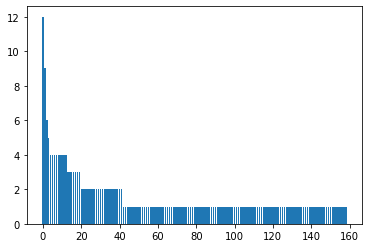

In [10]:
import numpy as np
import matplotlib.pyplot as plt

vect=CountVectorizer().fit(txt2)
count=vect.transform(txt2).toarray().sum(axis=0) # bow의 출현 횟수 합계
idx=np.argsort(-count) # 카운트 내림차순 정렬
count=count[idx] 
# x축의 단어 이름
feature_name=np.array(vect.get_feature_names())[idx]
plt.bar(range(len(count)), count)
plt.show()

In [13]:
# 불용어 추가
vector=CountVectorizer(stop_words=['비주', '동이', '중인', '중이'])
print(vector.fit_transform(txt2).toarray())
print(vector.vocabulary_)

[[ 6  1  1  1  4  2  1  4  3  2  1  3  1  2  1  1  1  1  1  1  2  1  1  1
   1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1  1  4  1  1  1  1
   9  1  2  4  1  1  1  1  2  1  1  3  1  1  1  1  1  1  1  1  2  1  1  1
   1  2  4  1  1  4  1  1  1  4  1  1  3  1  3  1  1  2  4  2  1  1  2  2
   2  2  1  1  1  1  1  1  1  1  1  1  1  3  1  1  1  1  2  1  1  2  1  1
   1  2  1  1  1  1  1  4  1  1 12  2  1  1  1  1  3  1  2  1  1  1  1  2
   1  1  1  1  1  1  1  1  1  1  2]]
{'치맥': 127, '전쟁': 109, '예고': 89, '제너시스': 111, '신제품': 81, '레트로': 41, '감성': 9, '트렌디': 139, '세대': 68, '겨냥': 13, '동시': 37, '공략': 16, '치킨': 130, '업계': 84, '처음': 121, '수제': 77, '맥주': 48, '가장': 4, '개발': 11, '기선': 26, '제압': 113, '지난': 118, '오후': 92, '가을': 3, '겨울': 14, '수기': 76, '옛날': 90, '통닭': 136, '해석': 150, '마리': 43, '세트': 69, '갈릭': 7, '와사비': 95, '다른': 32, '구성': 22, '한국인': 148, '입맛': 102, '마늘': 42, '시작': 80, '코끝': 132, '마무리': 44, '순간': 78, '바삭': 56, '껍질': 28, '숨기': 79, '육즙': 98, '입안': 103, '수가': 75, '판매': 143, '모금': 53,